In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import ipywidgets as widgets

# Visualization of Kitchen Data

In [2]:
labels_dir = "03_Labels"
data_dir = "02_Pozyx_Positioning_Data"

TYPE = "KITCHEN"
ANCHORS = 4
TRIAL = 1

label_fn = f"{TYPE}_A{ANCHORS}_{TRIAL}.txt"
data_fn = f"{TYPE}_A{ANCHORS}_{TRIAL}.csv"

label_fp = Path('.').joinpath(labels_dir, TYPE, label_fn)
data_fp = Path('.').joinpath(data_dir, TYPE, data_fn)

In [3]:
# Some preprocessing and cleaning
with open(label_fp) as f:
    labels = f.readlines()

label_keys = ["Timestamp", "Label"]
labels = [label.replace("\n","").split(": ")[::-1] for label in labels]
labels =  [{label_keys[0]: label[0], label_keys[1]:label[1]} for label in labels]

data = pd.read_csv(data_fp)
data.columns = ['Timestamp', 'POS_X', 'POS_Y', 'POS_Z', 'Heading', 'Pitch', 'Roll', 'ACC_X', 'ACC_Y', 'ACC_Z']
data = data.set_index('Timestamp')


# Sectioned Data

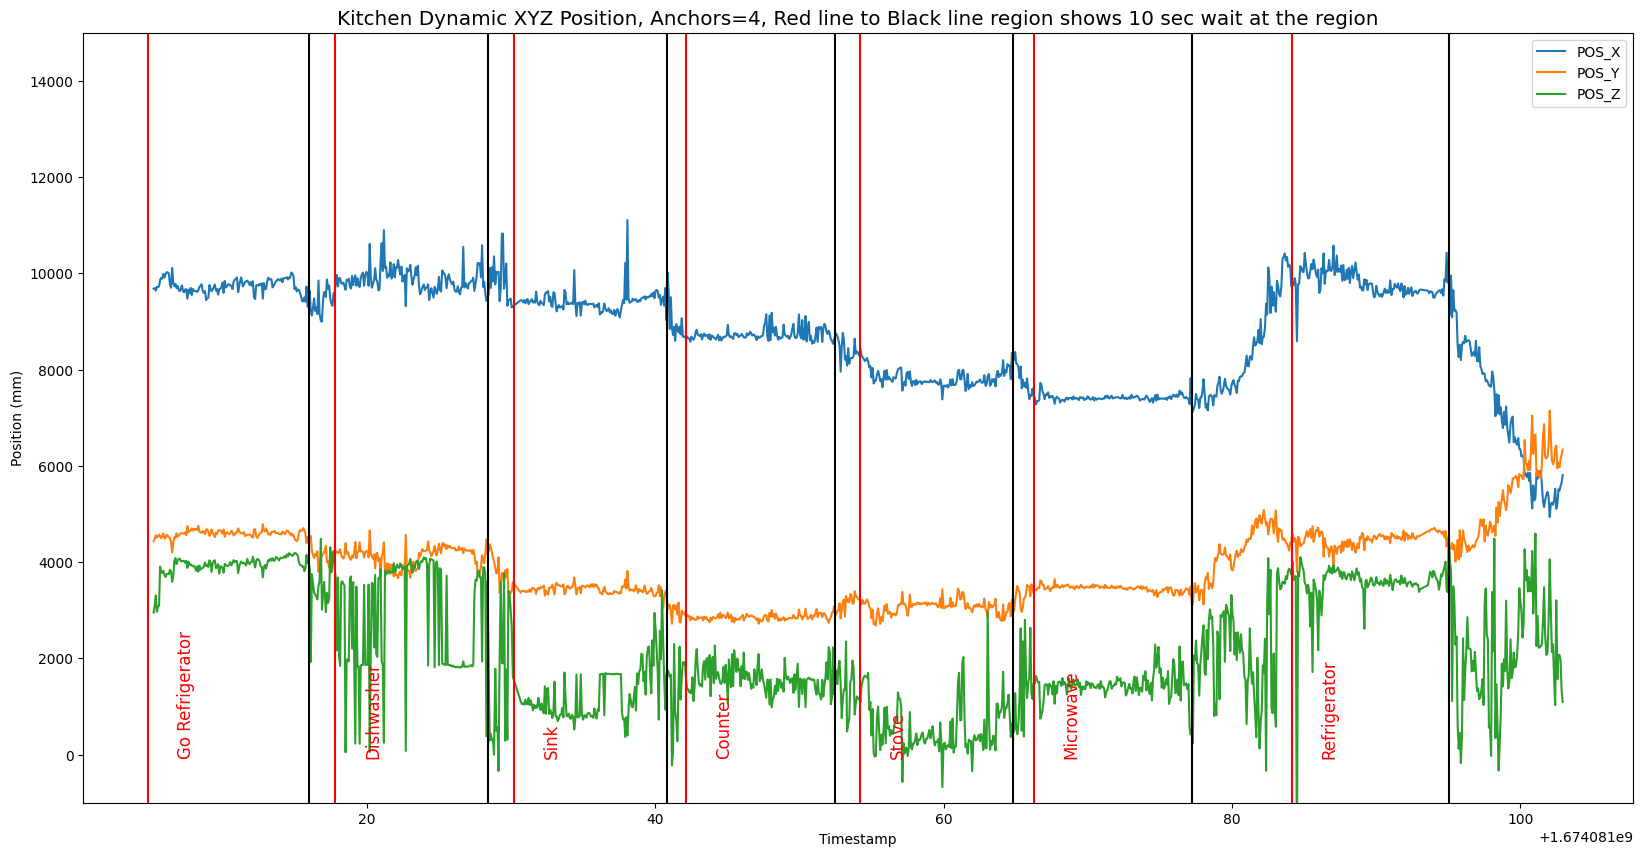

In [4]:
%matplotlib inline
ax = data.iloc[:, :3].plot(figsize=(20,10))
ax.set_title(f"Kitchen Dynamic XYZ Position, Anchors={ANCHORS}, Red line to Black line region shows 10 sec wait at the region", size="x-large")
ax.set_ylim(-1000, 15000)
ax.set_ylabel("Position (mm)")
for label in labels:
    if label["Label"] != "10 sec elapsed":
        ax.axvline(float(label['Timestamp']), color="red")
        ax.text(float(label['Timestamp'])+2,0,label["Label"], rotation=90, color="red", size="large")
    else:
        ax.axvline(float(label['Timestamp']), color="black")


# Interactive Timeline Plot

In [5]:

@widgets.interact(to_index=(0, 2000),window=(1,100))
def f(to_index=0,window=1):
    fig = plt.figure(figsize=(10,10))
    data_clean = data.rolling(window).mean()
    plt.plot(data_clean.iloc[:to_index, 0], data_clean.iloc[:to_index, 1])
    plt.xlabel("X(mm)")
    plt.ylabel("Y(mm)")
    plt.title(f"Kitchen Dynamic XY. Anchors={ANCHORS}")
    plt.xlim(0, 12000)
    plt.ylim(0,12000)

interactive(children=(IntSlider(value=0, description='to_index', max=2000), IntSlider(value=1, description='wi…

# Further Cleaning, Time Normalization and Comparison